<a href="https://colab.research.google.com/github/navas604/Ciencia-de-Datos-en-Python/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad Galileo**
## **Maestría en Data Science**
## **Ciencia de Datos en Python**
## **Antonio Everardo Navas Contreras, 14003163**
## **07/04/2021**

---

## **PROYECTO**

---

### Cargar Librerías

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Cargar Dataset, Explorarlo, Separar en Train y Test

In [2]:
# Cargar el Dataset original

URL = "proyecto_training_data.npy"
dataset = np.load(URL) 

In [86]:
dataset

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [4]:
# Explorando el Dataset

print("Dataset Shape:       ", dataset.shape)
print("Dataset type:        ", type(dataset))
print("Dataset nan values:  ", np.isnan(dataset).sum())

Dataset Shape:        (1460, 6)
Dataset type:         <class 'numpy.ndarray'>
Dataset nan values:   259


In [16]:
# Limpiar el dataset de valores "nan"

dataset = dataset[~np.isnan(dataset).any(axis=1)]

print("Dataset Shape:       ", dataset.shape)
print("Dataset type:        ", type(dataset))
print("Dataset nan values:  ", np.isnan(dataset).sum())

Dataset Shape:        (1201, 6)
Dataset type:         <class 'numpy.ndarray'>
Dataset nan values:   0


In [84]:
# Convertirlo a DataFrame

variables = list(["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])

df = pd.DataFrame(dataset, columns=variables)

df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1196,175000.0,6.0,953.0,7.0,1999.0,62.0
1197,210000.0,6.0,2073.0,7.0,1978.0,85.0
1198,266500.0,7.0,1188.0,9.0,1941.0,66.0
1199,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [7]:
# Revisar el tipo de las variables

print(df.dtypes)

SalePrice       float64
OverallQual     float64
1stFlrSF        float64
TotRmsAbvGrd    float64
YearBuilt       float64
LotFrontage     float64
dtype: object


In [8]:
# Convertir algunas variables a enteros
df["OverallQual"] = df["OverallQual"].astype(int)
df["TotRmsAbvGrd"] = df["TotRmsAbvGrd"].astype(int)
df["YearBuilt"] = df["YearBuilt"].astype(int)

print(df.dtypes)

SalePrice       float64
OverallQual       int64
1stFlrSF        float64
TotRmsAbvGrd      int64
YearBuilt         int64
LotFrontage     float64
dtype: object


In [9]:
df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7,856.0,8,2003,65.0
1,181500.0,6,1262.0,6,1976,80.0
2,223500.0,7,920.0,6,2001,68.0
3,140000.0,7,961.0,7,1915,60.0
4,250000.0,8,1145.0,9,2000,84.0
...,...,...,...,...,...,...
1196,175000.0,6,953.0,7,1999,62.0
1197,210000.0,6,2073.0,7,1978,85.0
1198,266500.0,7,1188.0,9,1941,66.0
1199,142125.0,5,1078.0,5,1950,68.0


In [10]:
# Separar dataframe en Train y Test

rows, columns = df.shape

train = df.loc[:int(rows*0.8),]
test = df.loc[int(rows*0.8)+1:,]

print("Train shape: ", train.shape)
print("Test shape:  ", test.shape)

Train shape:  (961, 6)
Test shape:   (240, 6)


In [11]:
print(train)
print(test)

     SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0     208500.0            7     856.0             8       2003         65.0
1     181500.0            6    1262.0             6       1976         80.0
2     223500.0            7     920.0             6       2001         68.0
3     140000.0            7     961.0             7       1915         60.0
4     250000.0            8    1145.0             9       2000         84.0
..         ...          ...       ...           ...        ...          ...
956   146000.0            6     855.0             7       1978         24.0
957   129000.0            5     894.0             5       1968        109.0
958   108959.0            4    1258.0             6       1969         60.0
959   233170.0            7    1502.0             7       2009         79.0
960   245350.0            8    1694.0             7       2008         64.0

[961 rows x 6 columns]
      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt 

### Análisis Exploratorio

In [12]:
# Media

print(" VARIABLE         MEDIA \n\n", round(np.mean(train, axis=0, ), 2))

 VARIABLE         MEDIA 

 SalePrice       181002.57
OverallQual          6.12
1stFlrSF          1155.83
TotRmsAbvGrd         6.50
YearBuilt         1970.64
LotFrontage         69.96
dtype: float64


In [13]:
# Valor Máximo

print(" VARIABLE      VALOR MAXIMO \n\n", np.max(train, axis=0))

 VARIABLE      VALOR MAXIMO 

 SalePrice       755000.0
OverallQual         10.0
1stFlrSF          3138.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64


In [17]:
# Valor Mínimo

print(" VARIABLE      VALOR MINIMO \n\n", np.min(train, axis=0))

 VARIABLE      VALOR MINIMO 

 SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1875.0
LotFrontage        21.0
dtype: float64


In [18]:
# Desviación Estándar

print(" VARIABLE    DESVIACION ESTANDAR \n\n", round(np.std(train, axis=0), 2))

 VARIABLE    DESVIACION ESTANDAR 

 SalePrice       83330.87
OverallQual         1.42
1stFlrSF          372.53
TotRmsAbvGrd        1.62
YearBuilt          31.53
LotFrontage        23.47
dtype: float64


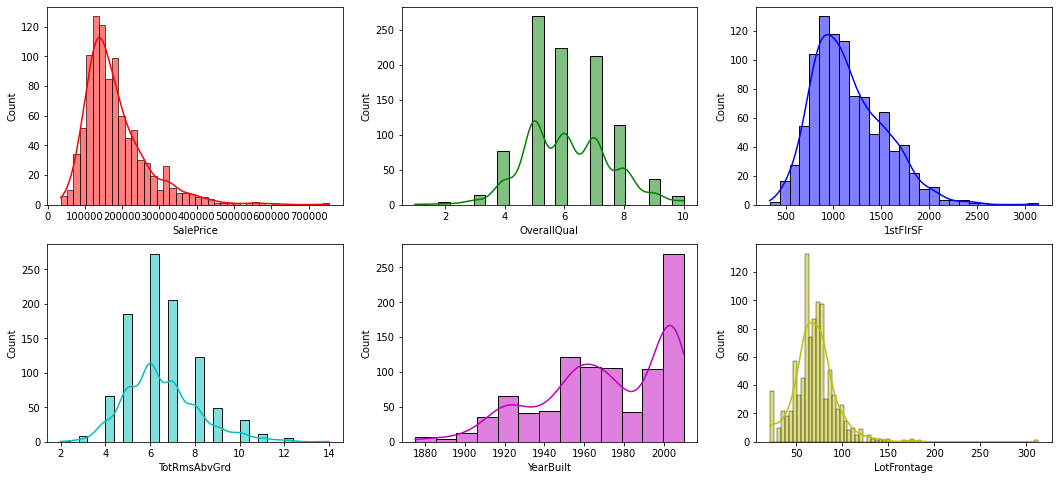

In [95]:
# Histograma de cada variable

size, axes = plt.subplots(2, 3, figsize=(18, 8))
#colors = 
#colors=["C0", "C1", "k"]
#colors = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
colors = ["r", "g", "b", "c", "m", "y"]

for i in range(columns-3):
  sns.histplot(train.iloc[:,i], kde=True, color=colors[i], ax=axes[0,i])
  sns.histplot(train.iloc[:,i+3], kde=True, color=colors[i+3], ax=axes[1,i])
